In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html

In [93]:
def find_contour(mask, approx_coeff=0.002, i=0):
    contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[i]
    epsilon = approx_coeff*cv.arcLength(cnt, True)
    approx_cnt = cv.approxPolyDP(cnt, epsilon, True)
    return approx_cnt


def mask_from_contour(contour, shape):
    print(contour)
    h, w = shape
    contour = (contour * np.array([w, h])).astype(int)
    print(contour)
    return cv.fillPoly(np.zeros(shape), [contour], color=(255, 255, 255))



In [94]:
mask = cv.imread("mask.png")
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)

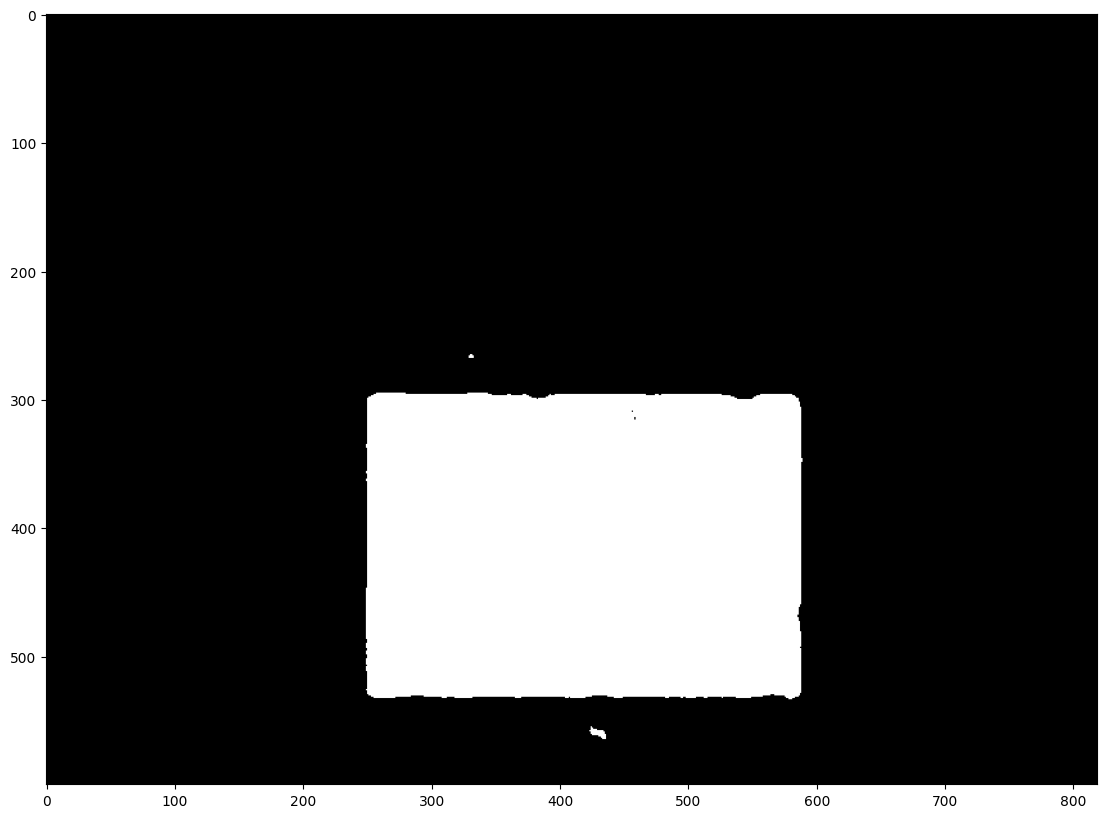

[[0.30525031 0.49833333]
 [0.30647131 0.88333333]
 [0.66910867 0.88666667]
 [0.69108669 0.88166667]
 [0.70573871 0.88833333]
 [0.71550672 0.88333333]
 [0.71672772 0.80166667]
 [0.71306471 0.78      ]
 [0.71672772 0.765     ]
 [0.71794872 0.57666667]
 [0.71428571 0.49833333]
 [0.70818071 0.49333333]
 [0.67887668 0.49333333]
 [0.67032967 0.5       ]
 [0.64102564 0.49333333]
 [0.47863248 0.49333333]
 [0.46642247 0.5       ]
 [0.45543346 0.49333333]
 [0.31379731 0.49166667]]
[[250 299]
 [251 530]
 [548 532]
 [566 529]
 [578 533]
 [586 530]
 [587 481]
 [584 468]
 [587 459]
 [588 346]
 [585 299]
 [580 296]
 [556 296]
 [549 300]
 [525 296]
 [392 296]
 [382 300]
 [373 296]
 [257 295]]


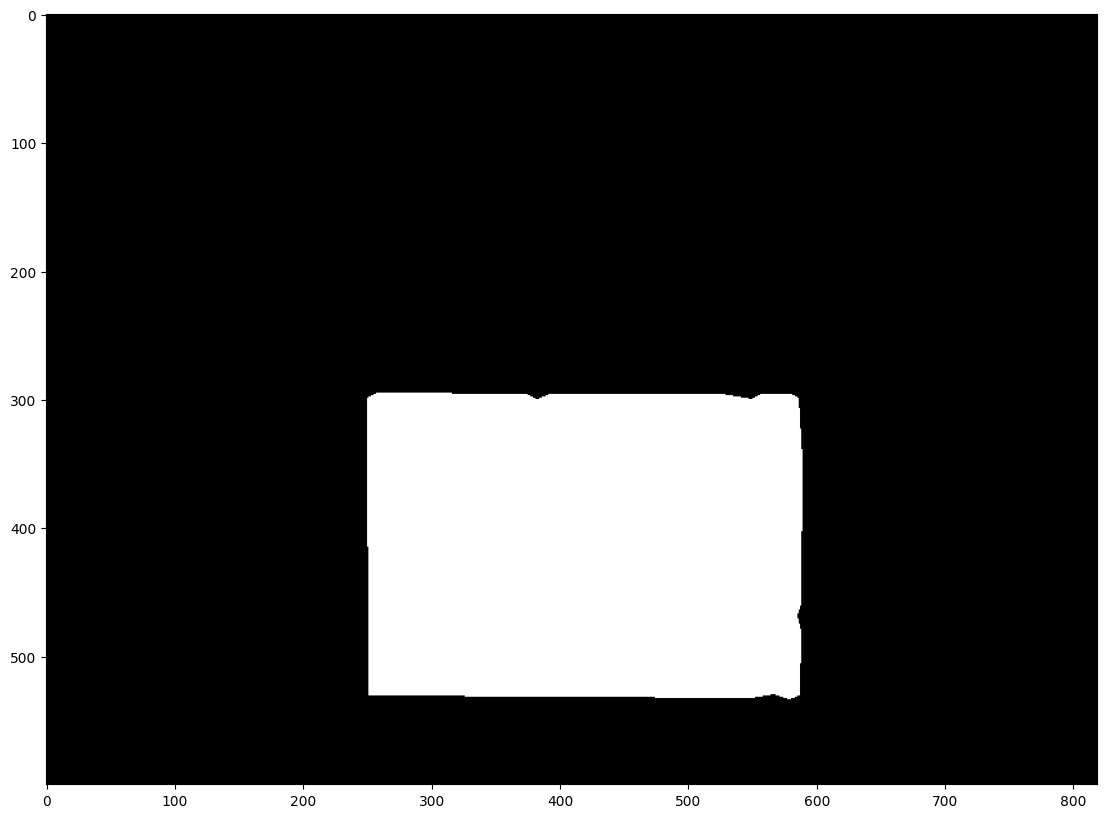

In [95]:
h, w = mask.shape
contour = find_contour(mask, i=1).squeeze()/np.array([w, h])

plt.figure(figsize=(20,10))
plt.imshow(mask, cmap="gray")
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(mask_from_contour(contour, mask.shape), cmap="gray")
plt.show()

In [97]:
approx_coeff=0.002
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
epsilon = approx_coeff*cv.arcLength(cnt, True)
approx_cnt = cv.approxPolyDP(cnt, epsilon, True)

In [98]:
approx_cnt

array([[[250, 299]],

       [[251, 530]],

       [[548, 532]],

       [[566, 529]],

       [[578, 533]],

       [[586, 530]],

       [[587, 481]],

       [[584, 468]],

       [[587, 459]],

       [[588, 346]],

       [[585, 299]],

       [[580, 296]],

       [[556, 296]],

       [[549, 300]],

       [[525, 296]],

       [[392, 296]],

       [[382, 300]],

       [[373, 296]],

       [[257, 295]]], dtype=int32)

In [99]:
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
area_max = 0
for c in contours:
    area = cv.contourArea(c)
    if area > area_max:
        print(area)
        area_max = area
        cnt = c.copy()

48.5
79133.0


In [100]:
cv.contourArea(cnt)

79133.0

In [101]:
epsilon = 0.002*cv.arcLength(cnt, True)
approx_cnt = cv.approxPolyDP(cnt, epsilon, True)

In [102]:
approx_cnt

array([[[250, 299]],

       [[251, 530]],

       [[548, 532]],

       [[566, 529]],

       [[578, 533]],

       [[586, 530]],

       [[587, 481]],

       [[584, 468]],

       [[587, 459]],

       [[588, 346]],

       [[585, 299]],

       [[580, 296]],

       [[556, 296]],

       [[549, 300]],

       [[525, 296]],

       [[392, 296]],

       [[382, 300]],

       [[373, 296]],

       [[257, 295]]], dtype=int32)

In [103]:
contour = approx_cnt.copy()
shape = mask.shape
h, w = shape
# contour2 = (contour * np.array([w, h])).astype(int)
img = cv.fillPoly(np.zeros(shape), [contour], color=(255, 255, 255))

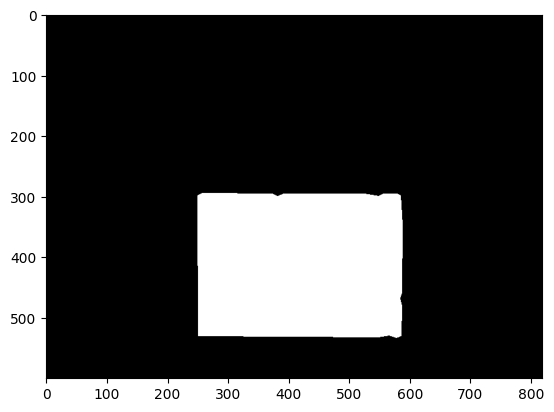

In [105]:
plt.imshow(img, cmap="gray")

In [87]:
contour2

array([[[204750, 179400]],

       [[205569, 318000]],

       [[448812, 319200]],

       [[463554, 317400]],

       [[473382, 319800]],

       [[479934, 318000]],

       [[480753, 288600]],

       [[478296, 280800]],

       [[480753, 275400]],

       [[481572, 207600]],

       [[479115, 179400]],

       [[475020, 177600]],

       [[455364, 177600]],

       [[449631, 180000]],

       [[429975, 177600]],

       [[321048, 177600]],

       [[312858, 180000]],

       [[305487, 177600]],

       [[210483, 177000]]])

In [88]:
img = cv.fillPoly(np.zeros(shape), [contour2], color=(255, 255, 255))

In [89]:
img.ravel().max()

0.0

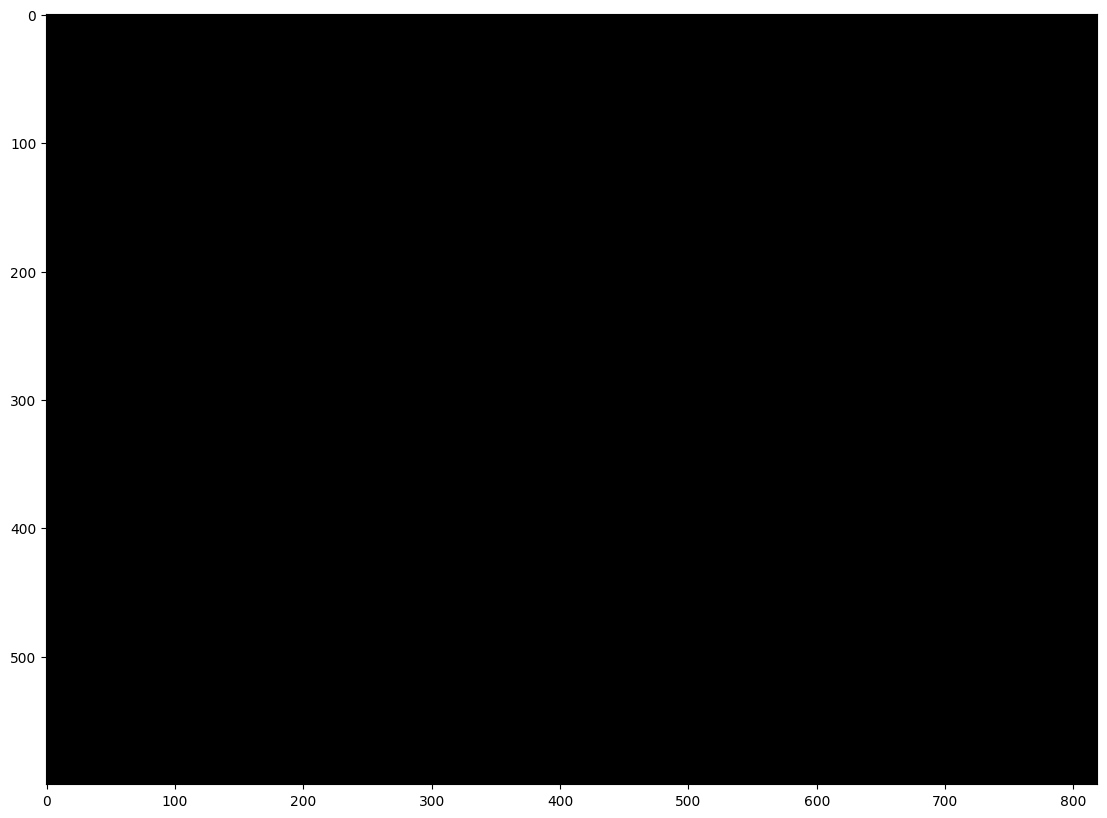

In [55]:
plt.figure(figsize=(20, 10))
plt.imshow(mask_from_contour(approx_cnt, mask.shape), cmap="gray")
plt.show()